In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load training set and test set
# We will look at the training set for prepocessing and adjust the test set accordingly

training_set = pd.read_csv('dataset/train.csv')
test_set = pd.read_csv('dataset/test.csv')

In [3]:
# Explore the features

training_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Drop the ID, it's not meaningful

training_set = training_set.drop(['Id'], axis=1)
test_set = test_set.drop(['Id'], axis=1)

In [5]:
# Check percentage of missing values per feature
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percent_missing(training_set)
percent_nan

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Electrical'),
  Text(1, 0, 'MasVnrType'),
  Text(2, 0, 'MasVnrArea'),
  Text(3, 0, 'BsmtQual'),
  Text(4, 0, 'BsmtCond'),
  Text(5, 0, 'BsmtFinType1'),
  Text(6, 0, 'BsmtExposure'),
  Text(7, 0, 'BsmtFinType2'),
  Text(8, 0, 'GarageCond'),
  Text(9, 0, 'GarageQual'),
  Text(10, 0, 'GarageFinish'),
  Text(11, 0, 'GarageType'),
  Text(12, 0, 'GarageYrBlt'),
  Text(13, 0, 'LotFrontage'),
  Text(14, 0, 'FireplaceQu'),
  Text(15, 0, 'Fence'),
  Text(16, 0, 'Alley'),
  Text(17, 0, 'MiscFeature'),
  Text(18, 0, 'PoolQC')])

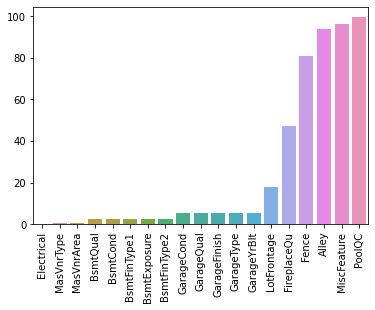

In [6]:
# Plot count of missing values per feature

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

(0.0, 1.0)

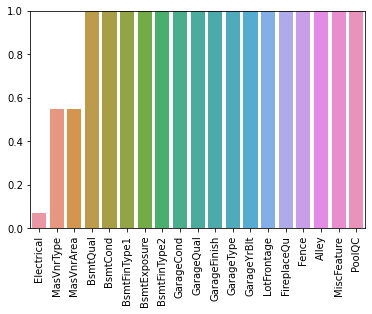

In [7]:
# Zoom on (0,1)

sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [8]:
# Electrical represents the Electrical system of the house:
#      SBrkr -> Standard Circuit Breakers & Romex
#      FuseA -> Fuse Box over 60 AMP and all Romex wiring (Average)	
#      FuseF -> 60 AMP Fuse Box and mostly Romex wiring (Fair)
#      FuseP -> 60 AMP Fuse Box and mostly knob & tube wiring (poor)
#      Mix   -> Mixed


training_set['Electrical'].isnull().sum()

1

In [9]:
test_set['Electrical'].isnull().sum()

0

In [10]:
# There is only one house with missing information about the electrical
# system, we can drop it

training_set = training_set.dropna(axis=0, subset=['Electrical'])

In [11]:
# Check again

training_set['Electrical'].isnull().sum()

0

In [12]:
# MasVnrType represents the masonry veneer type:
#       BrkCmn   -> Brick Common
#       BrkFace  -> Brick Face
#       CBlock   -> Cinder Block
#       None     -> None
#       Stone    -> Stone

# MasVnrArea is the masonry veneer area in square feet

training_set['MasVnrType'].isnull().sum(), training_set['MasVnrArea'].isnull().sum()

(8, 8)

In [13]:
# Explore the tuples with missing MasVnrType and MasVnrArea

training_set[training_set['MasVnrType'].isnull()]['MasVnrType'], training_set[training_set['MasVnrType'].isnull()]['MasVnrArea']

(234     NaN
 529     NaN
 650     NaN
 936     NaN
 973     NaN
 977     NaN
 1243    NaN
 1278    NaN
 Name: MasVnrType, dtype: object,
 234    NaN
 529    NaN
 650    NaN
 936    NaN
 973    NaN
 977    NaN
 1243   NaN
 1278   NaN
 Name: MasVnrArea, dtype: float64)

In [14]:
# We can assume that NaN values here are used to express that 
# the masonry veneer is None and the area should be zero

training_set['MasVnrType'] = training_set['MasVnrType'].fillna('NA')
training_set['MasVnrArea'] = training_set['MasVnrType'].fillna(0)

test_set['MasVnrType'] = test_set['MasVnrType'].fillna('NA')
test_set['MasVnrArea'] = test_set['MasVnrType'].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'BsmtQual'),
  Text(1, 0, 'BsmtCond'),
  Text(2, 0, 'BsmtFinType1'),
  Text(3, 0, 'BsmtExposure'),
  Text(4, 0, 'BsmtFinType2'),
  Text(5, 0, 'GarageType'),
  Text(6, 0, 'GarageYrBlt'),
  Text(7, 0, 'GarageFinish'),
  Text(8, 0, 'GarageQual'),
  Text(9, 0, 'GarageCond'),
  Text(10, 0, 'LotFrontage'),
  Text(11, 0, 'FireplaceQu'),
  Text(12, 0, 'Fence'),
  Text(13, 0, 'Alley'),
  Text(14, 0, 'MiscFeature'),
  Text(15, 0, 'PoolQC')])

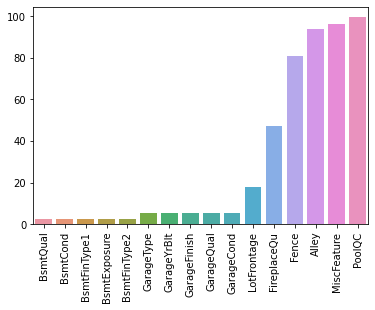

In [15]:
# Check again the plot

percent_nan = percent_missing(training_set)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [16]:
# We can clearly see that all the features regarding the basement have the same count values
# because the houses have no basement

bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2']
training_set[bsmt_cols] = training_set[bsmt_cols].fillna('NA')

test_set[bsmt_cols] = test_set[bsmt_cols].fillna('NA')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'GarageType'),
  Text(1, 0, 'GarageYrBlt'),
  Text(2, 0, 'GarageFinish'),
  Text(3, 0, 'GarageQual'),
  Text(4, 0, 'GarageCond'),
  Text(5, 0, 'LotFrontage'),
  Text(6, 0, 'FireplaceQu'),
  Text(7, 0, 'Fence'),
  Text(8, 0, 'Alley'),
  Text(9, 0, 'MiscFeature'),
  Text(10, 0, 'PoolQC')])

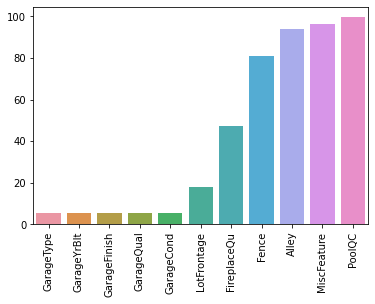

In [17]:
# Check again the plot

percent_nan = percent_missing(training_set)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [18]:
# Do the same for the Garage

garage_cols = ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']
training_set[garage_cols] = training_set[garage_cols].fillna('NA')

training_set['GarageYrBlt'] = training_set['GarageYrBlt'].fillna(0)

test_set[garage_cols] = test_set[garage_cols].fillna('NA')

test_set['GarageYrBlt'] = test_set['GarageYrBlt'].fillna(0)

(80.0, 100.0)

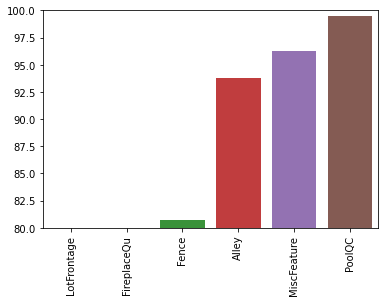

In [19]:
percent_nan = percent_missing(training_set)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(80,100)

In [20]:
# Replace Fence and FireplaceQU with missing values with None, 
# drop the columns with NaN values > 92.5%

training_set = training_set.drop(['Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu'], axis=1)
test_set = test_set.drop(['Alley', 'MiscFeature', 'PoolQC', 'FireplaceQu'], axis=1)

In [21]:
training_set['Fence'] = training_set['Fence'].fillna('NA')
test_set['Fence'] = test_set['Fence'].fillna('NA')

(array([0]), [Text(0, 0, 'LotFrontage')])

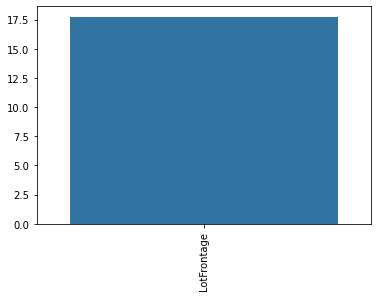

In [22]:
percent_nan = percent_missing(training_set)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [23]:
# Replace the LotFrontage missing values with the mean of the neighborhood

training_set['LotFrontage'] = training_set.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

# Careful to use the estimation of the training set, not the one of the test set

test_set['LotFrontage'] = training_set.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'LotFrontage'),
  Text(1, 0, 'Exterior1st'),
  Text(2, 0, 'Exterior2nd'),
  Text(3, 0, 'BsmtFinSF1'),
  Text(4, 0, 'BsmtFinSF2'),
  Text(5, 0, 'BsmtUnfSF'),
  Text(6, 0, 'TotalBsmtSF'),
  Text(7, 0, 'KitchenQual'),
  Text(8, 0, 'GarageCars'),
  Text(9, 0, 'GarageArea'),
  Text(10, 0, 'SaleType'),
  Text(11, 0, 'Utilities'),
  Text(12, 0, 'BsmtFullBath'),
  Text(13, 0, 'BsmtHalfBath'),
  Text(14, 0, 'Functional'),
  Text(15, 0, 'MSZoning')])

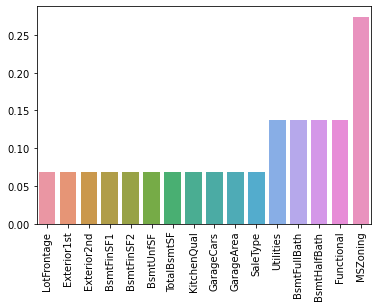

In [25]:
# Check other missing values on the test set

percent_nan = percent_missing(test_set)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)

In [27]:
# Some features on the test set have less than 0.25% of missing values, we can drop the rows

test_set = test_set.dropna()

In [32]:
# Lastly, transform categorical features in a ML-friendly fashion

training_set['MSSubClass'] = training_set['MSSubClass'].apply(str)

object_df = pd.get_dummies(training_set.select_dtypes(include='object'), drop_first=True)
numeric_df = pd.get_dummies(training_set.select_dtypes(exclude='object'))

final_training_set = pd.concat([numeric_df, object_df], axis=1)

In [33]:
# Do the same on the test set

test_set['MSSubClass'] = test_set['MSSubClass'].apply(str)

object_df = pd.get_dummies(test_set.select_dtypes(include='object'), drop_first=True)
numeric_df = pd.get_dummies(test_set.select_dtypes(exclude='object'))

final_test_set = pd.concat([numeric_df, object_df], axis=1)

In [34]:
final_training_set

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,1,0,0,0,1,0


In [35]:
final_test_set

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,0,0,0,0,1,0,0,0,1,0
4,84.0,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,62.0,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0,0,0,0,1,0,0,0,1,0
1455,62.0,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,0,0,0,0,1,0,0,0,0,0
1456,85.0,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
1457,66.0,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
# Save to CSV for next step

final_training_set.to_csv('preprocessed_training_set.csv', index=False)
final_test_set.to_csv('preprocessed_test_set.csv', index=False)